In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName("BooksDataset").getOrCreate()
sc = spark.sparkContext  # Get Spark Context

In [ ]:
 # Load a CSV file into a PySpark DataFrame
df = spark.read.csv("/content/drive/MyDrive/booksdataset.csv", header=True, inferSchema=True)

In [ ]:
df.printSchema()
df.show()

root
 |-- Id: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- RatingDist1: string (nullable = true)
 |-- pagesNumber: string (nullable = true)
 |-- RatingDist4: string (nullable = true)
 |-- RatingDistTotal: string (nullable = true)
 |-- PublishMonth: string (nullable = true)
 |-- PublishDay: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- CountsOfReview: string (nullable = true)
 |-- PublishYear: string (nullable = true)
 |-- Language: string (nullable = true)
 |-- Authors: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- RatingDist2: string (nullable = true)
 |-- RatingDist5: string (nullable = true)
 |-- ISBN: string (nullable = true)
 |-- RatingDist3: string (nullable = true)

+---+--------------------+-----------+-----------+-----------+---------------+------------+----------+--------------------+--------------+-----------+--------+--------------------+------+-----------+-----------+----------+-----------+
| Id|         

In [ ]:
 df.dtypes

[('Id', 'int'),
 ('Name', 'string'),
 ('RatingDist1', 'string'),
 ('pagesNumber', 'string'),
 ('RatingDist4', 'string'),
 ('RatingDistTotal', 'string'),
 ('PublishMonth', 'string'),
 ('PublishDay', 'string'),
 ('Publisher', 'string'),
 ('CountsOfReview', 'string'),
 ('PublishYear', 'string'),
 ('Language', 'string'),
 ('Authors', 'string'),
 ('Rating', 'string'),
 ('RatingDist2', 'string'),
 ('RatingDist5', 'string'),
 ('ISBN', 'string'),
 ('RatingDist3', 'string')]

In [ ]:
 df.show()

+---+--------------------+-----------+-----------+-----------+---------------+------------+----------+--------------------+--------------+-----------+--------+--------------------+------+-----------+-----------+----------+-----------+
| Id|                Name|RatingDist1|pagesNumber|RatingDist4|RatingDistTotal|PublishMonth|PublishDay|           Publisher|CountsOfReview|PublishYear|Language|             Authors|Rating|RatingDist2|RatingDist5|      ISBN|RatingDist3|
+---+--------------------+-----------+-----------+-----------+---------------+------------+----------+--------------------+--------------+-----------+--------+--------------------+------+-----------+-----------+----------+-----------+
|  1|Harry Potter and ...|6.913888889|        652|   4:556485|  total:2298124|          16|         9|     Scholastic Inc.|         28062|       2006|     eng|        J.K. Rowling|  4.57|    2:25317|  5:1546466|      NULL|   3:159960|
|  2|Harry Potter and ...|    1:12455|        870|   4:60428

In [ ]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- RatingDist1: string (nullable = true)
 |-- pagesNumber: string (nullable = true)
 |-- RatingDist4: string (nullable = true)
 |-- RatingDistTotal: string (nullable = true)
 |-- PublishMonth: string (nullable = true)
 |-- PublishDay: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- CountsOfReview: string (nullable = true)
 |-- PublishYear: string (nullable = true)
 |-- Language: string (nullable = true)
 |-- Authors: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- RatingDist2: string (nullable = true)
 |-- RatingDist5: string (nullable = true)
 |-- ISBN: string (nullable = true)
 |-- RatingDist3: string (nullable = true)



In [ ]:
 from pyspark.sql.functions import col, sum
 missing_values = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
 missing_values.show()

+---+----+-----------+-----------+-----------+---------------+------------+----------+---------+--------------+-----------+--------+-------+------+-----------+-----------+----+-----------+
| Id|Name|RatingDist1|pagesNumber|RatingDist4|RatingDistTotal|PublishMonth|PublishDay|Publisher|CountsOfReview|PublishYear|Language|Authors|Rating|RatingDist2|RatingDist5|ISBN|RatingDist3|
+---+----+-----------+-----------+-----------+---------------+------------+----------+---------+--------------+-----------+--------+-------+------+-----------+-----------+----+-----------+
|  0|   0|          0|          0|          0|              0|           0|         0|     1084|             2|          0|   83744|     20|    10|          2|          4|1296|          0|
+---+----+-----------+-----------+-----------+---------------+------------+----------+---------+--------------+-----------+--------+-------+------+-----------+-----------+----+-----------+



In [ ]:
from pyspark.sql.functions import col

# Fill missing values in numerical columns with 0
numeric_cols = [
    "pagesNumber", "CountsOfReview", "PublishYear", "PublishMonth",
    "PublishDay", "Rating", "RatingDist1", "RatingDist2",
    "RatingDist3", "RatingDist4", "RatingDist5"
]

df_filled = df.fillna(0, subset=numeric_cols)

# Fill missing values in categorical columns with "Unknown"
df_filled = df_filled.fillna("Unknown", subset=["Publisher", "Language", "Authors", "ISBN"])



In [ ]:
print(f"no of rows: {df.count()}")
print(f"no of columns: {len(df.columns)}")

no of rows: 130000
no of columns: 18


In [ ]:
 df.describe().show()

+-------+-----------------+--------------------+------------------+--------------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+-----------------+------------------+------------------+--------------------+-------------------+
|summary|               Id|                Name|       RatingDist1|         pagesNumber|       RatingDist4|   RatingDistTotal|        PublishMonth|       PublishDay|         Publisher|    CountsOfReview|       PublishYear|          Language|             Authors|           Rating|       RatingDist2|       RatingDist5|                ISBN|        RatingDist3|
+-------+-----------------+--------------------+------------------+--------------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+-----------------+

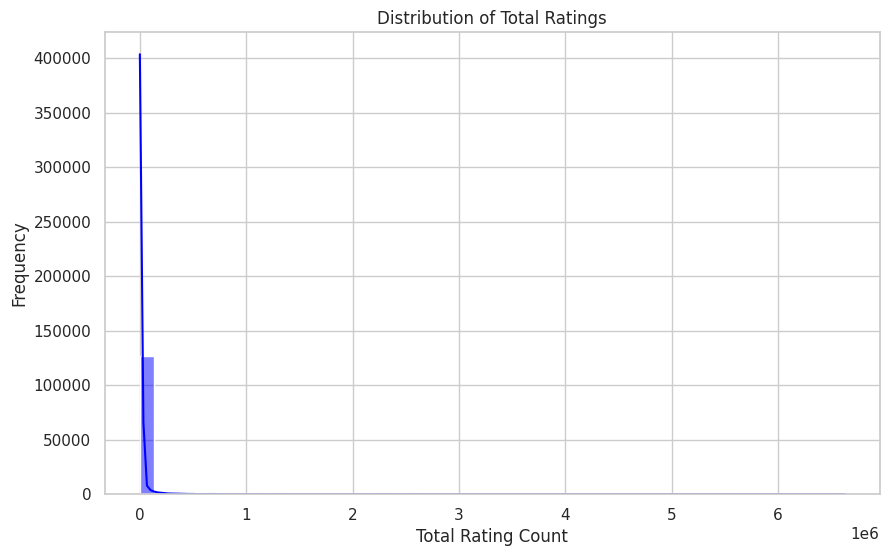

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/booksdataset.csv"
df = pd.read_csv(file_path)

df['RatingDistTotal'] = df['RatingDistTotal'].str.replace('total:', '', regex=True).astype(float)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['RatingDistTotal'], bins=50, kde=True, color='blue')
plt.xlabel("Total Rating Count")
plt.ylabel("Frequency")
plt.title("Distribution of Total Ratings")
plt.show()


<ipython-input-54-06d51733b9ae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_highest_books['Name'], x=top_10_highest_books['RatingDistTotal'], palette='viridis')


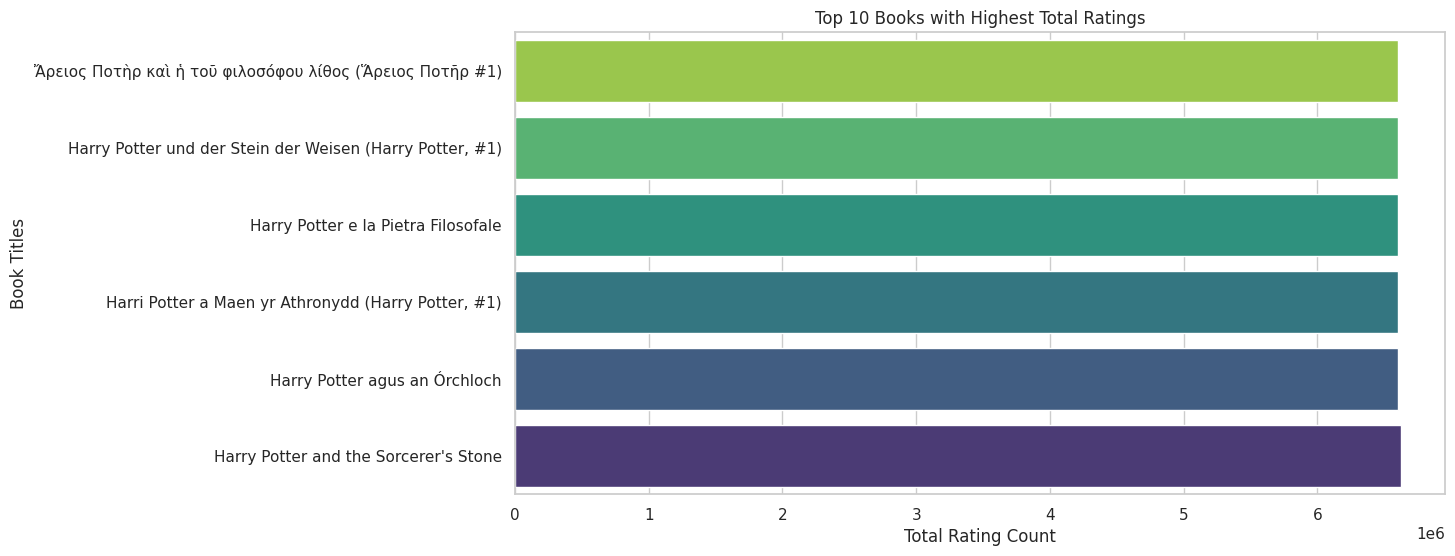

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/booksdataset.csv"
df = pd.read_csv(file_path)

df['RatingDistTotal'] = df['RatingDistTotal'].astype(str).str.replace('total:', '', regex=True).astype(float)

top_10_highest_books = df.nlargest(10, 'RatingDistTotal')
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_highest_books['Name'], x=top_10_highest_books['RatingDistTotal'], palette='viridis')
plt.xlabel("Total Rating Count")
plt.ylabel("Book Titles")
plt.title("Top 10 Books with Highest Total Ratings")
plt.gca().invert_yaxis()
plt.show()

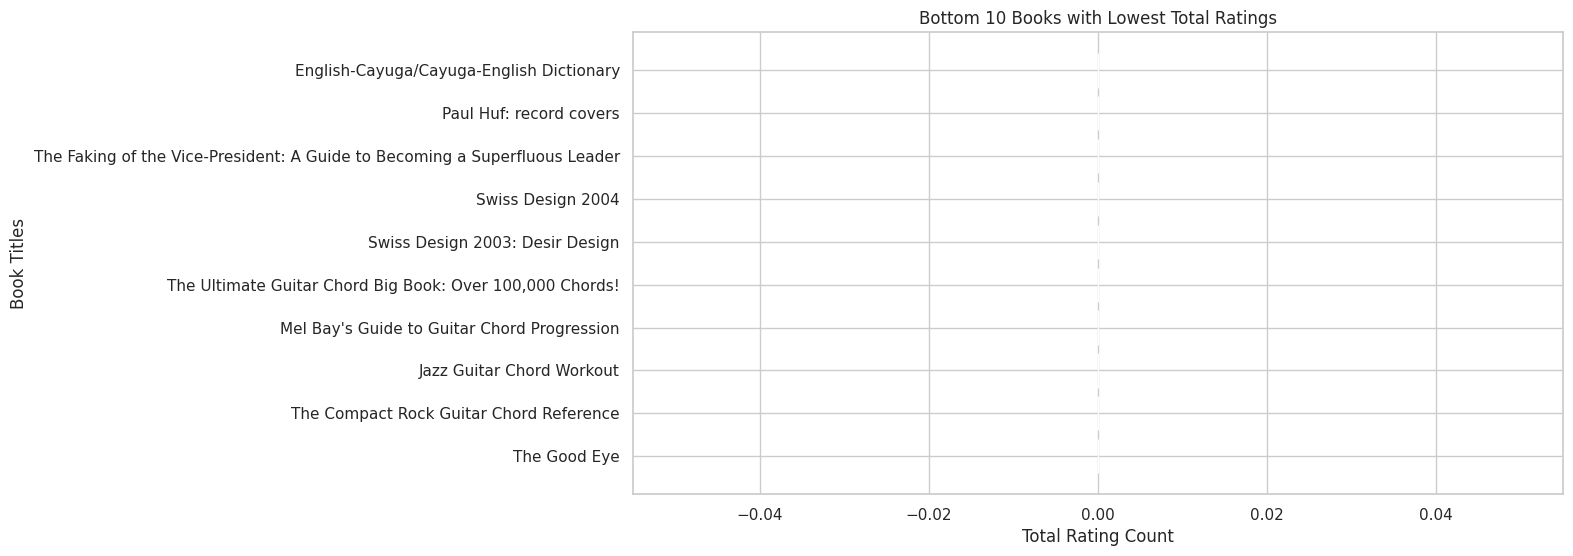

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/booksdataset.csv"
df = pd.read_csv(file_path)

df['RatingDistTotal'] = df['RatingDistTotal'].str.replace('total:', '').astype(float)

bottom_books = df.nsmallest(10, 'RatingDistTotal')

plt.figure(figsize=(12, 6))
plt.barh(bottom_books['Name'], bottom_books['RatingDistTotal'], color='salmon')
plt.xlabel("Total Rating Count")
plt.ylabel("Book Titles")
plt.title("Bottom 10 Books with Lowest Total Ratings")
plt.gca().invert_yaxis()  # Invert y-axis to show lowest on top
plt.show()

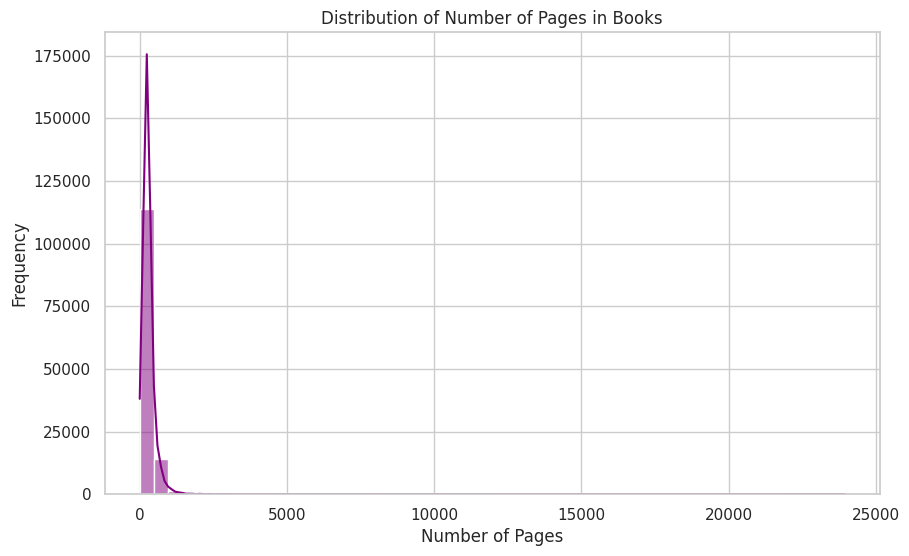

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/booksdataset.csv"
df = pd.read_csv(file_path)
plt.figure(figsize=(10, 6))
sns.histplot(df['pagesNumber'].dropna(), bins=50, kde=True, color='purple')
plt.xlabel("Number of Pages")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Pages in Books")
plt.show()


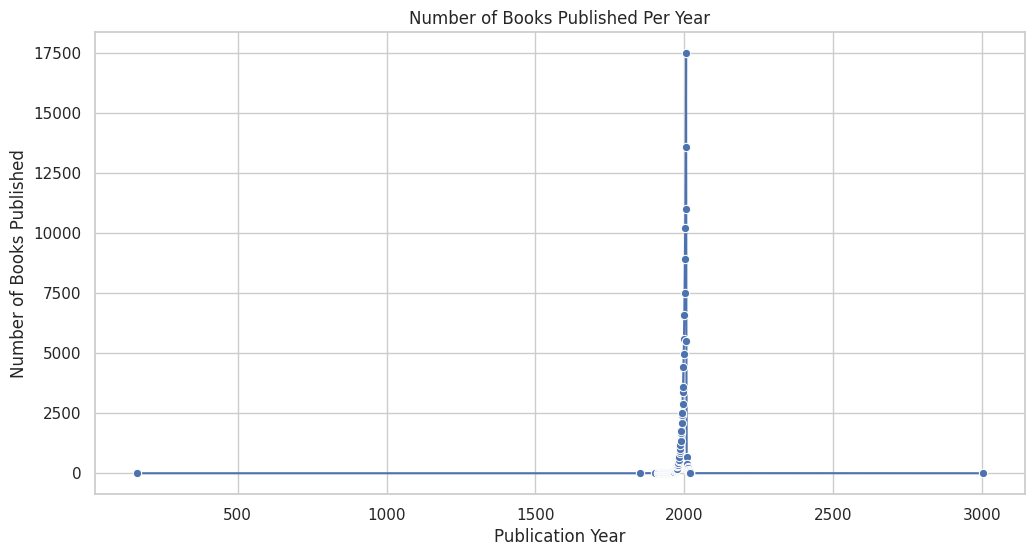

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
books_per_year = df['PublishYear'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=books_per_year.index, y=books_per_year.values, marker='o', linestyle='-')
plt.xlabel("Publication Year")
plt.ylabel("Number of Books Published")
plt.title("Number of Books Published Per Year")
plt.grid(True)
plt.show()

<ipython-input-19-1ec20aab35f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette="Blues_r")


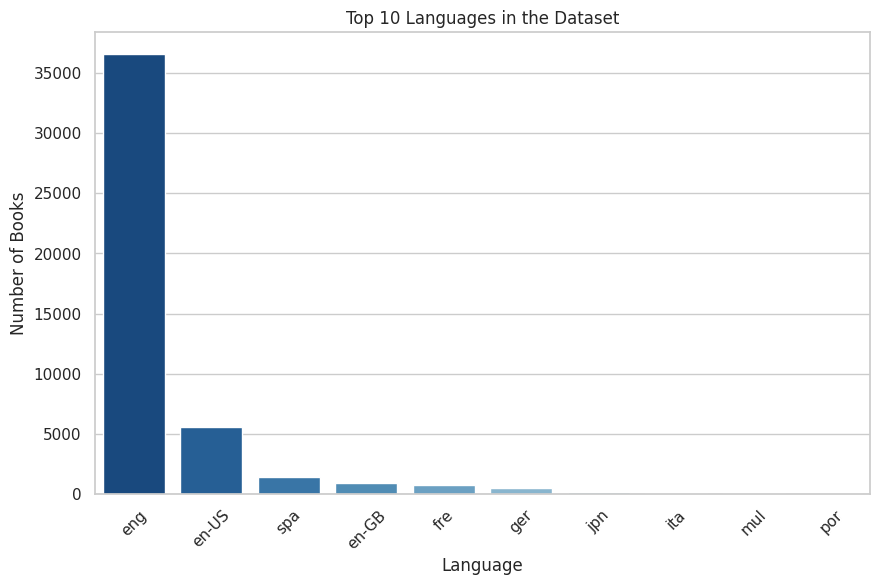

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
top_languages = df['Language'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette="Blues_r")
plt.xlabel("Language")
plt.ylabel("Number of Books")
plt.title("Top 10 Languages in the Dataset")
plt.xticks(rotation=45)
plt.show()

In [ ]:
file_path = "/content/drive/MyDrive/booksdataset.csv"  # Change this to the correct file path
rdd = sc.textFile(file_path)

## Transformation

In [ ]:
header = rdd.first()
data_rdd = rdd.filter(lambda row: row != header)
data_rdd.take(5)

['1,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",6.913888889,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,,3:159960',
 '2,"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.5,2:37005,5:1493113,439358078,3:211781',
 '3,"Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1)",1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,,3:567458',
 '4,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,439554896,3:288821',
 '5,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848']

In [ ]:
#groupBy
books_by_publisher_rdd = data_rdd.groupBy(lambda x: x[8])
books_by_publisher_rdd.take(5)

[(' ', <pyspark.resultiterable.ResultIterable at 0x790afa019750>),
 ('U', <pyspark.resultiterable.ResultIterable at 0x790afce26a90>),
 ('S', <pyspark.resultiterable.ResultIterable at 0x790af3b59850>),
 ('o', <pyspark.resultiterable.ResultIterable at 0x790afa1b3d10>),
 ('.', <pyspark.resultiterable.ResultIterable at 0x790afb34b3d0>)]

In [ ]:
# Flattening the grouped books by publisher
flattened_books_rdd = books_by_publisher_rdd.flatMap(lambda x: x[1])

flattened_elements = flattened_books_rdd.take(5)
print(flattened_elements)


['1,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",6.913888889,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,,3:159960', '2,"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.5,2:37005,5:1493113,439358078,3:211781', '3,"Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1)",1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,,3:567458', '4,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,439554896,3:288821', '5,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848']


In [ ]:
# Sampling the data (e.g., 10% sample)
sampled_books_rdd = data_rdd.sample(False, 0.1)
sample_elements = sampled_books_rdd.take(5)
print(sample_elements)

['1,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",6.913888889,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,,3:159960', '2,"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.5,2:37005,5:1493113,439358078,3:211781', '5,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848', '10,"Harry Potter Collection (Harry Potter, #1-6)",0.220138889,3342,3.193055556,total:30313,12,9,Scholastic,809,2005,eng,J.K. Rowling,4.73,0.234722222,5:24406,439827604,0.870833333', '27,Neither Here nor There: Travels in Europe,0.855555556,254,4:20655,total:54388,28,3,William Morrow Paperbacks,2264,1993,eng,Bill Bryson,3.86,2.378472222,5:15888,380713802,3:13368']


## Action

In [ ]:
#Count the number of books
book_count = data_rdd.count()
print(f"Total number of books: {book_count}")

Total number of books: 130000


In [ ]:
#Collect and print the first 5 rows
first_five_rows = data_rdd.take(5)
print("First five rows:")
for row in first_five_rows:
    print(row)

First five rows:
1,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",6.913888889,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,,3:159960
2,"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.5,2:37005,5:1493113,439358078,3:211781
3,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,,3:567458
4,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,439554896,3:288821
5,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [ ]:
#count by the number of rows in each language
language_counts_rdd = data_rdd.map(lambda x: (x[9], 1)).reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1], ascending=False)

language_counts = language_counts_rdd.collect()
print("Languages and their book counts (sorted):")
for language, count in language_counts:
    print(f"  {language}: {count}")

Languages and their book counts (sorted):
   : 27493
  e: 15989
  t: 8108
  i: 7292
  r: 7212
  a: 6930
  n: 5802
  l: 5287
  o: 4911
  s: 4579
  d: 3548
  c: 3143
  m: 2660
  h: 2453
  u: 2355
  g: 2051
  k: 1941
  p: 1804
  y: 1410
  v: 1340
  f: 1128
  b: 950
  w: 892
  C: 764
  S: 705
  B: 520
  L: 517
  P: 502
  M: 461
  ': 444
  D: 438
  A: 419
  H: 374
  T: 371
  .: 359
  W: 356
  G: 355
  I: 324
  E: 313
  z: 306
  F: 296
  R: 245
  ,: 220
  N: 209
  x: 200
  j: 187
  O: 162
  -: 157
  :: 136
  V: 122
  Y: 116
  K: 114
  0: 113
  U: 107
  q: 93
  J: 86
  1: 86
  Q: 65
  3: 34
  の: 33
  é: 28
  6: 25
  2: 22
  ú: 18
  9: 18
  金: 18
  Z: 14
  8: 13
  7: 12
  터: 12
  !: 11
  ツ: 10
  ñ: 10
  4: 9
  5: 9
  部: 9
  ï: 9
  í: 8
  ": 8
  錬: 8
  ر: 8
  ó: 6
  ²: 6
  á: 6
  X: 5
  &: 5
  ’: 5
  �: 5
  ö: 5
  て: 4
  /: 4
  ä: 4
  و: 4
  や: 4
  è: 4
  Ú: 4
  Á: 4
  波: 4
  ペ: 3
  т: 3
  國: 3
  ê: 3
  子: 3
  考: 3
  ら: 3
  ½: 2
  ō: 2
  а: 2
  船: 2
  \: 2
  н: 2
  猟: 2
  ̈: 2
  ́: 2
  ι: 2
  ¹

In [ ]:
#countByValue
 # Count occurrences of each unique value in a column
def count_by_value(index):
    return data_rdd.map(lambda x: x[index]).countByValue()
print("Count by Value:", count_by_value(1))

Count by Value: defaultdict(<class 'int'>, {',': 24, '0': 13714, '2': 13245, '3': 12460, '4': 12998, '8': 12808, '1': 12832, '5': 13260, '6': 13170, '7': 12706, '9': 12783})


In [ ]:
#Count()
# Convert relevant columns to float
def parse_row(row):
    try:
        return [row[0]] + [float(val) if val.replace(".", "").isdigit() else val for val in row[1:]]
    except:
        return None

data_rdd = data_rdd.map(parse_row).filter(lambda x: x is not None)

print("Total Records:", data_rdd.count())

Total Records: 129992


In [ ]:
#first()
first_book = data_rdd.first()
print("First book in the dataset:", first_book)

First book in the dataset: ['1', ',', '"', 'H', 'a', 'r', 'r', 'y', ' ', 'P', 'o', 't', 't', 'e', 'r', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'H', 'a', 'l', 'f', '-', 'B', 'l', 'o', 'o', 'd', ' ', 'P', 'r', 'i', 'n', 'c', 'e', ' ', '(', 'H', 'a', 'r', 'r', 'y', ' ', 'P', 'o', 't', 't', 'e', 'r', ',', ' ', '#', 6.0, ')', '"', ',', 6.0, '.', 9.0, 1.0, 3.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, ',', 6.0, 5.0, 2.0, ',', 4.0, ':', 5.0, 5.0, 6.0, 4.0, 8.0, 5.0, ',', 't', 'o', 't', 'a', 'l', ':', 2.0, 2.0, 9.0, 8.0, 1.0, 2.0, 4.0, ',', 1.0, 6.0, ',', 9.0, ',', 'S', 'c', 'h', 'o', 'l', 'a', 's', 't', 'i', 'c', ' ', 'I', 'n', 'c', '.', ',', 2.0, 8.0, 0.0, 6.0, 2.0, ',', 2.0, 0.0, 0.0, 6.0, ',', 'e', 'n', 'g', ',', 'J', '.', 'K', '.', ' ', 'R', 'o', 'w', 'l', 'i', 'n', 'g', ',', 4.0, '.', 5.0, 7.0, ',', 2.0, ':', 2.0, 5.0, 3.0, 1.0, 7.0, ',', 5.0, ':', 1.0, 5.0, 4.0, 6.0, 4.0, 6.0, 6.0, ',', ',', 3.0, ':', 1.0, 5.0, 9.0, 9.0, 6.0, 0.0]


## **ML**


In [ ]:
# Importing functions for column selection and aggregation (mean)
from pyspark.sql.functions import col, mean
from pyspark.ml.feature import VectorAssembler


In [ ]:
# Define feature columns and label column(target)
feature_cols = [
    'RatingDist1', 'RatingDist2', 'RatingDist3',
    'RatingDist4', 'RatingDist5', 'RatingDistTotal',
    'pagesNumber', 'PublishMonth', 'PublishDay',
    'PublishYear', 'CountsOfReview'
]
label_col = 'Rating'



In [ ]:
# Cast feature columns and label column to double
# Convert Pandas DataFrame to PySpark DataFrame
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
books_df = spark.createDataFrame(df)

for col_name in feature_cols + [label_col]:
    books_df = books_df.withColumn(col_name, col(col_name).cast("double"))


In [ ]:
# Fill missing values with the mean of each column
for col_name in feature_cols + [label_col]:
    mean_value = books_df.select(mean(col(col_name))).collect()[0][0]
    # Check if mean_value is None and replace with 0 if it is
    if mean_value is None:
        mean_value = 0.0
    books_df = books_df.fillna(mean_value, subset=[col_name])

In [ ]:
# Initialize VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

In [ ]:
# Transform the DataFrame to create a "features" column
df_final = assembler.transform(books_df).select("features", label_col)

In [ ]:
# Show final DataFrame structure
df_final.show(5, truncate=False)
df_final.printSchema()

+---------------------------------------------------------------------------------------------------------------------------------------+------+
|features                                                                                                                               |Rating|
+---------------------------------------------------------------------------------------------------------------------------------------+------+
|[6.913888889,0.7530677599776769,1.0187489765433684,1.1412100622491104,1.170481432576805,2298124.0,652.0,16.0,9.0,2006.0,28062.0]       |4.57  |
|[0.6177783732138342,0.7530677599776769,1.0187489765433684,1.1412100622491104,1.170481432576805,2358637.0,870.0,1.0,9.0,2004.0,29770.0] |4.5   |
|[0.6177783732138342,0.7530677599776769,1.0187489765433684,1.1412100622491104,1.170481432576805,6587388.0,309.0,1.0,11.0,2003.0,75911.0]|4.47  |
|[0.6177783732138342,0.7530677599776769,1.0187489765433684,1.1412100622491104,1.170481432576805,2560657.0,352.0,1.0,11.0,2003.0,24

In [ ]:
# Split the data (80% train, 20% test)
train_df, test_df = df_final.randomSplit([0.8, 0.2], seed=42)



In [ ]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scaler_model = scaler.fit(train_df)
train_df_scaled = scaler_model.transform(train_df).select("scaledFeatures", "Rating")
test_df_scaled = scaler_model.transform(test_df).select("scaledFeatures", "Rating")

# Evaluator
evaluator_rmse = RegressionEvaluator(labelCol="Rating", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="Rating", predictionCol="prediction", metricName="r2")


In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StandardScaler

# Standard Scaling
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scaler_model = scaler.fit(train_df)

# Transform Train and Test Data
train_df_scaled = scaler_model.transform(train_df).select("scaledFeatures", label_col)
test_df_scaled = scaler_model.transform(test_df).select("scaledFeatures", label_col)

# Initialize Decision Tree Regressor (After Scaling)
dt = DecisionTreeRegressor(featuresCol="scaledFeatures", labelCol=label_col, seed=42)

# Train the Model
dt_model = dt.fit(train_df_scaled)

# Make Predictions
predictions_dt = dt_model.transform(test_df_scaled)

# Evaluate Model Performance
evaluator_rmse = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="mae")

# Evaluate Metrics
rmse_dt = evaluator_rmse.evaluate(predictions_dt)
r2_dt = evaluator_r2.evaluate(predictions_dt)
mae_dt = evaluator_mae.evaluate(predictions_dt)

# Display Results
print("\n📊 Decision Tree Regressor Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")



📊 Decision Tree Regressor Model Performance:
Root Mean Squared Error (RMSE): 0.40
R² Score: 0.8383
Mean Absolute Error (MAE): 0.27


In [ ]:
# Make Predictions on Test Data using the scaled test data (test_df_scaled)
predictions = dt_model.transform(test_df_scaled)  # Use test_df_scaled here

# Show Predictions
predictions.select("scaledFeatures", "Rating", "prediction").show(10, truncate=False)  # Select scaledFeatures

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+------------------+
|scaledFeatures                                                                                                                                                                                                                 |Rating|prediction        |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+------------------+
|[-1.2167739543859357,-0.9890102066677263,-0.8726783144027718,-0.9255116827364228,-0.9193106507184633,-0.11317063388229572,-0.31418693033447326,-0.5090576592688999,0.7238736354327658,0.6186464689687438,-0.07508795392169024] |3.48  |3.9081903696

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StandardScaler

# Standard Scaling
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scaler_model = scaler.fit(train_df)

# Transform Train and Test Data
train_df_scaled = scaler_model.transform(train_df).select("scaledFeatures", label_col)
test_df_scaled = scaler_model.transform(test_df).select("scaledFeatures", label_col)

# Initialize Linear Regression Model (After Scaling)
lr = LinearRegression(featuresCol="scaledFeatures", labelCol=label_col)

# Train the Model
lr_model = lr.fit(train_df_scaled)

# Make Predictions
predictions_lr = lr_model.transform(test_df_scaled)

# Evaluate Model Performance
evaluator_rmse = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="mae")

# Evaluate Metrics
rmse_lr = evaluator_rmse.evaluate(predictions_lr)
r2_lr = evaluator_r2.evaluate(predictions_lr)
mae_lr = evaluator_mae.evaluate(predictions_lr)

# Display Results
print("\n📊 Linear Regression Model Performance:")
print(f"R² Score: {r2_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")



📊 Linear Regression Model Performance:
R² Score: 0.0099
Root Mean Squared Error (RMSE): 1.00
Mean Absolute Error (MAE): 0.57


In [ ]:
# Make Predictions on Test Data using the scaled test data (test_df_scaled)
predictions = lr_model.transform(test_df_scaled)  # Use test_df_scaled instead of test_df

# Show Predictions
predictions.select("scaledFeatures", "Rating", "prediction").show(10, truncate=False)


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+------------------+
|scaledFeatures                                                                                                                                                                                                                 |Rating|prediction        |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+------------------+
|[-1.2167739543859357,-0.9890102066677263,-0.8726783144027718,-0.9255116827364228,-0.9193106507184633,-0.11317063388229572,-0.31418693033447326,-0.5090576592688999,0.7238736354327658,0.6186464689687438,-0.07508795392169024] |3.48  |3.6842094225

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StandardScaler

# Standard Scaling
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scaler_model = scaler.fit(train_df)

# Transform Train and Test Data
train_df_scaled = scaler_model.transform(train_df).select("scaledFeatures", label_col)
test_df_scaled = scaler_model.transform(test_df).select("scaledFeatures", label_col)

# Initialize Random Forest Regressor (After Scaling)
rf = RandomForestRegressor(featuresCol="scaledFeatures", labelCol=label_col)

# Train the Model
rf_model = rf.fit(train_df_scaled)

# Make Predictions
predictions_rf = rf_model.transform(test_df_scaled)

# Evaluate Model Performance
evaluator_rmse = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="mae")

# Evaluate Metrics
rmse_rf = evaluator_rmse.evaluate(predictions_rf)
r2_rf = evaluator_r2.evaluate(predictions_rf)
mae_rf = evaluator_mae.evaluate(predictions_rf)

# Display Results
print("\n📊 Random Forest Regressor Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")




📊 Random Forest Regressor Model Performance:
Root Mean Squared Error (RMSE): 0.40
Mean Absolute Error (MAE): 0.28
R² Score: 0.8405


In [ ]:
# Make Predictions on Test Data using the scaled test data (test_df_scaled)
predictions = rf_model.transform(test_df_scaled)  # Use test_df_scaled instead of test_df

# Show Predictions
predictions.select("scaledFeatures", "Rating", "prediction").show(10, truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+------------------+
|scaledFeatures                                                                                                                                                                                                                 |Rating|prediction        |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+------------------+
|[-1.2167739543859357,-0.9890102066677263,-0.8726783144027718,-0.9255116827364228,-0.9193106507184633,-0.11317063388229572,-0.31418693033447326,-0.5090576592688999,0.7238736354327658,0.6186464689687438,-0.07508795392169024] |3.48  |3.7499734342